In [ ]:
import pandas as pd
import shutil
import os

# define the file path and name
zip_file_path = "/content/matrixTFIDF.xlsx"

# copy the file to a temporary location
temp_file_path = "temp_file.xlsx"
shutil.copyfile(zip_file_path, temp_file_path)

# read in the copied file using pandas
d = pd.read_excel(temp_file_path)

# do your data analysis
# ...

# delete the temporary file when done
os.remove(temp_file_path)

# print the dimensions of the dataset
print("La dimension de dataset est :", d.shape)

# print the dataset info
print(d.info())


La dimension de dataset est : (6236, 4034)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Columns: 4034 entries, Unnamed: 0 to يونس
dtypes: float64(3996), int64(37), object(1)
memory usage: 191.9+ MB
None


In [ ]:
 d1=pd.read_excel("/content/Coran.xlsx")
 d1.columns=['Unnamed: 00', 'Unnamed: 1', 'SORANO',
       'SORATYPE', 'SORANAME', 'Lemmes']
 d2=pd.concat([d,d1], axis=1, join='inner')
 d2.columns

Index(['Unnamed: 0', 'آت', 'آتى', 'آتية', 'آثر', 'آثم', 'آخذ', 'آخر', 'آخرة',
       'آدم',
       ...
       'يهودي', 'يوسف', 'يوم', 'يونس', 'Unnamed: 00', 'Unnamed: 1', 'SORANO',
       'SORATYPE', 'SORANAME', 'Lemmes'],
      dtype='object', length=4040)

In [ ]:
print("Nombre de sourates",d1.SORANO.iloc[-1])
print("Nombre de versets",len(d1.SORANO))
print("Nombre de classes de sourates",len(d1['SORATYPE'].unique()),"et lesquelles",d1['SORATYPE'].unique())
print("Nombre de sourates dans chaque classe",d1.groupby('SORATYPE')['SORANAME'].nunique())
print("Nombre de  versets dans chaque classe",d1.groupby('SORATYPE')['Lemmes'].nunique())
print('Nomber de lignes:', len(d1))
print('Nomber de columns:', len(d1.columns))

Nombre de sourates 114
Nombre de versets 6236
Nombre de classes de sourates 2 et lesquelles ['مكية' 'مدنية']
Nombre de sourates dans chaque classe SORATYPE
مدنية    28
مكية     86
Name: SORANAME, dtype: int64
Nombre de  versets dans chaque classe SORATYPE
مدنية    1579
مكية     4393
Name: Lemmes, dtype: int64
Nomber de lignes: 6236
Nomber de columns: 6


Text(0.5, 1.0, 'No. of Ayats in each Surah')

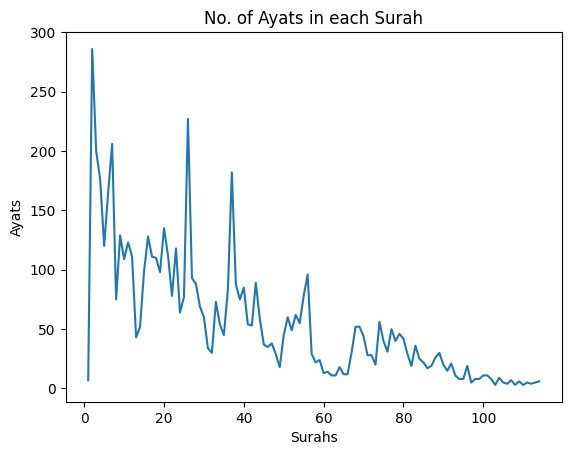

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(115)
dd2 = d1.groupby('SORANO')['Unnamed: 1'].agg('count')
dd2 #grouper les sourates par nombre de eyete 
surahs = np.delete(a, 0)
surahs
ayats_in_surahs = dd2.array
plt.plot(surahs,ayats_in_surahs )
plt.xlabel('Surahs')
plt.ylabel('Ayats') 
plt.title('No. of Ayats in each Surah')
#line plot pour le nombre de ayates dans chaque surahs

Text(0.5, 1.0, 'No. of Ayats in each Surah')

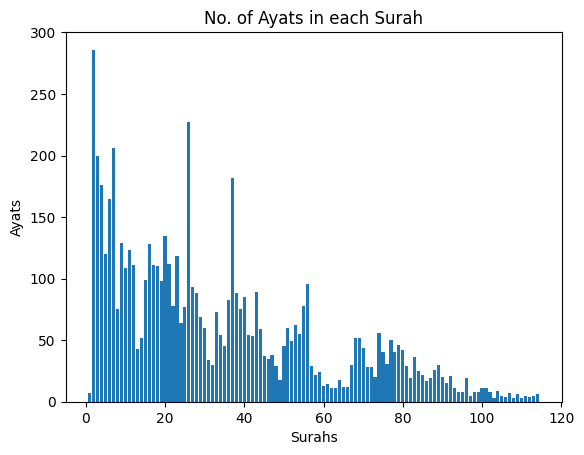

In [ ]:
plt.bar(surahs,ayats_in_surahs)
plt.xlabel('Surahs')
plt.ylabel('Ayats') 
plt.title('No. of Ayats in each Surah')
#bar plot pour le nombre de ayate dans chaque surah

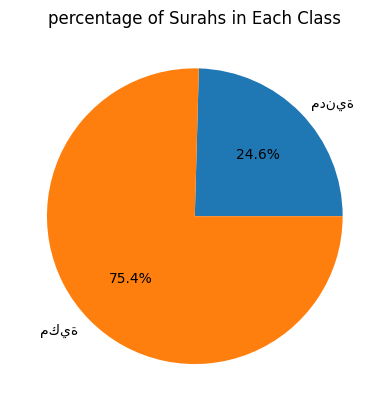

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# get the number of surahs in each class
surahs_in_classes = d1['SORANAME'].groupby(d1['SORATYPE']).nunique()

# create a pie chart
plt.pie(surahs_in_classes, labels=surahs_in_classes.index, autopct='%1.1f%%')
plt.title('percentage of Surahs in Each Class')

# show the plot
plt.show()

In [ ]:
words = []
d3=d1[d1['Lemmes'].notnull()]
d4=d1[d1['Lemmes'].isnull()]
print(d4)
l=d3['Lemmes'].tolist()
for i in range(6229):
  l[i]=" ".join(l[i].split())
print(l)
print(l[0].split(' '))
for i in range(6229):
    word = l[i].split(' ')
    for j in range(len(word)):
          words.append(word[j])
len(words)

      Unnamed: 00  Unnamed: 1  SORANO SORATYPE SORANAME Lemmes
4133         4133           1      40     مكية     غافر    NaN
4218         4218           1      41     مكية     فصلت    NaN
4272         4272           1      42     مكية   الشورى    NaN
4325         4325           1      43     مكية   الزخرف    NaN
4414         4414           1      44     مكية   الدخان    NaN
4473         4473           1      45     مكية  الجاثية    NaN
4510         4510           1      46     مكية  الأحقاف    NaN
['اسم الله رحم رحم', 'حمد الله رب عالم', 'رحم رحم', 'مالك يوم دين', 'عبد استعان', 'هدى صراط مستقيم', 'صراط أنعم مغضوب ضال', 'الم', 'كتاب ريب هدى متق', 'آمن غيب أقام صلاة رزق أنفق', 'آمن أنزل أنزل آخرة أيقن', 'هدى رب مفلح', 'كفر سواء أنذر أنذر آمن', 'ختم الله ب سمع بصر غشاوة عذاب عظيم', 'إنسان آمن الله يوم آخر مؤمن', 'خادع الله آمن خدع شعر', 'ب مرض زاد الله مرض عذاب أليم كذب', 'أفسد أرض مصلح', 'مفسد شعر', 'آمن آمن إنسان آمن آمن سفيه سفيه علم', 'لقي آمن آمن خلى شيطان', 'الله استهزأ مد طغيان عم

44404

Chaque mot ou on le trouve

In [ ]:
d9=d3.copy()
l4={}
for i in range(len(words)):
  l4[words[i]]=[]
def serach_number_aytes_ss(ayah,surah):
    for s in ayah:
      for i in s.split(' '): 
        if(i in words):
          if(surah not in l4[i]):
            l4[i].append(surah)
l5=d9.groupby('SORANAME')['Lemmes'].apply(list)
for k in list(l5.keys()):
  serach_number_aytes_ss(l5[k],k)
for k in list(l4.keys()):
  print(k," ",l4[k])

اسم   ['آل عمران', 'الأعراف', 'الأعلى', 'الأنعام', 'الإسراء', 'الإنسان', 'البقرة', 'الحاقة', 'الحج', 'الحجرات', 'الحشر', 'الرحمن', 'الصف', 'العلق', 'الفاتحة', 'المائدة', 'المزمل', 'النجم', 'النمل', 'النور', 'الواقعة', 'طه', 'مريم', 'هود', 'يوسف']
الله   ['آل عمران', 'إبراهيم', 'الأحزاب', 'الأحقاف', 'الأعراف', 'الأعلى', 'الأنبياء', 'الأنعام', 'الأنفال', 'الإخلاص', 'الإسراء', 'الإنسان', 'الإنشقاق', 'الإنفطار', 'البروج', 'البقرة', 'البينة', 'التحريم', 'التغابن', 'التكوير', 'التوبة', 'التين', 'الجاثية', 'الجمعة', 'الجن', 'الحاقة', 'الحج', 'الحجر', 'الحجرات', 'الحديد', 'الحشر', 'الدخان', 'الذاريات', 'الرعد', 'الروم', 'الزخرف', 'الزمر', 'السجدة', 'الشعراء', 'الشمس', 'الشورى', 'الصافات', 'الصف', 'الطلاق', 'الطور', 'العلق', 'العنكبوت', 'الغاشية', 'الفاتحة', 'الفتح', 'الفرقان', 'القصص', 'الكهف', 'المؤمنون', 'المائدة', 'المجادلة', 'المدثر', 'المزمل', 'المعارج', 'الملك', 'الممتحنة', 'المنافقون', 'النازعات', 'الناس', 'النجم', 'النحل', 'النساء', 'النصر', 'النمل', 'النور', 'الهمزة', 'سبأ', 'ص', 'طه'

Calcul nombre de repetition d'une mot

In [ ]:
dwords = pd.DataFrame(words)
dwords1 = dwords[0].str.strip()
dwords1 = pd.DataFrame(dwords1)
dwords2 = pd.DataFrame(dwords1.groupby(0)[0].agg('count').sort_values(axis = 0, ascending=False))
dwords2['words'] = dwords2.index
dwords2 = dwords2.rename(columns={0: 'word_counts'})
i = np.arange(len(dwords2))
dwords2.set_index(i, inplace= True)
dwords2

,word_counts,words
0,2786,الله
1,982,رب
2,556,آمن
3,521,علم
4,464,أرض
...,...,...
4041,1,فارق
4042,1,فارغ
4043,1,فارض
4044,1,تغشى


**Répartition** des Versets

In [ ]:
import pandas as pd
import nltk

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')

# Définir la fonction pour compter les mots dans un verset
def compter_mots(verset):
    if isinstance(verset, str):
        mots = nltk.word_tokenize(verset)
        return len(mots)
    else:
        return 0

# Charger la base de données

# Ajouter une colonne "nombre_de_mots"
d1['nombre_de_mots'] = d1['Lemmes'].apply(compter_mots)

# Ajouter une colonne "classe" basée sur la longueur des d1
def assigner_classe(longueur):
    if longueur <= 10:
        return 'court'
    elif longueur <= 20:
        return 'moyen'
    else:
        return 'long'
    
d1['classe'] = d1['nombre_de_mots'].apply(assigner_classe)

# Afficher les 10 premières lignes du résultat
print(d1.head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   Unnamed: 00  Unnamed: 1  SORANO SORATYPE SORANAME  \
0            0           0       1     مكية  الفاتحة   
1            1           1       1     مكية  الفاتحة   
2            2           2       1     مكية  الفاتحة   
3            3           3       1     مكية  الفاتحة   
4            4           4       1     مكية  الفاتحة   
5            5           5       1     مكية  الفاتحة   
6            6           6       1     مكية  الفاتحة   
7            0           1       2    مدنية   البقرة   
8            8           2       2    مدنية   البقرة   
9            9           3       2    مدنية   البقرة   

                        Lemmes  nombre_de_mots classe  
0             اسم الله رحم رحم               4  court  
1             حمد الله رب عالم               4  court  
2                      رحم رحم               2  court  
3                 مالك يوم دين               3  court  
4                   عبد استعان               2  court  
5              هدى صراط مستقيم               3 

**Répartition de sourat**

In [ ]:
import pandas as pd
import nltk

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')

# Définir la fonction pour compter les mots dans un verset
def compter_mots(verset):
    if isinstance(verset, str):
        mots = nltk.word_tokenize(verset)
        return len(mots)
    else:
        return 0


# Ajouter une colonne "nombre_de_mots"
d1['nombre_de_mots'] = d1['Lemmes'].apply(compter_mots)

# Ajouter une colonne "classe" basée sur la longueur des d1
def assigner_classe(longueur):
    if longueur <= 10:
        return 'court'
    elif longueur <= 20:
        return 'moyen'
    else:
        return 'long'
    
d1['classe'] = d1['nombre_de_mots'].apply(assigner_classe)

# Répartition des sourates par classe
sourates_classe = d1.groupby(['SORANAME', 'classe']).size().reset_index(name='nb_versets')
print(sourates_classe)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     SORANAME classe  nb_versets
0    آل عمران  court         121
1    آل عمران   long           6
2    آل عمران  moyen          72
3     إبراهيم  court          33
4     إبراهيم   long           1
..        ...    ...         ...
205      يوسف   long           1
206      يوسف  moyen          30
207      يونس  court          80
208      يونس   long           3
209      يونس  moyen          26

[210 rows x 3 columns]


Distribution

In [ ]:
import pandas as pd
import nltk

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')

# Définir la fonction pour compter les mots dans un verset
def compter_mots(verset):
    if isinstance(verset, str):
        mots = nltk.word_tokenize(verset)
        return len(mots)
    else:
        return 0


# Ajouter une colonne "nombre_de_mots"
d1['nombre_de_mots'] = d1['Lemmes'].apply(compter_mots)

# Ajouter une colonne "classe" basée sur la longueur des d1
def assigner_classe(longueur):
    if longueur <= 10:
        return 'court'
    elif longueur <= 20:
        return 'moyen'
    else:
        return 'long'

d1['classe'] = d1['nombre_de_mots'].apply(assigner_classe)

# Distribution du nombre de d1 par sourate
d1_par_sourate = d1.groupby(['SORANAME'])['Lemmes'].count()
print("Distribution du nombre de versets par sourate :\n", d1_par_sourate)

# Distribution du nombre de mots clés par verset
mots_cles_par_verset = d1['nombre_de_mots'].sum()
print("\nNombre de mots clés par verset :\n", mots_cles_par_verset)

# Distribution du nombre de mots clés par sourate
mots_cles_par_sourate = d1.groupby(['SORANAME'])['nombre_de_mots'].sum()
print("\nDistribution du nombre de mots clés par sourate :\n", mots_cles_par_sourate)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Distribution du nombre de versets par sourate :
 SORANAME
آل عمران    199
إبراهيم      52
الأحزاب      73
الأحقاف      34
الأعراف     206
           ... 
نوح          28
هود         123
يس           83
يوسف        111
يونس        109
Name: Lemmes, Length: 114, dtype: int64

Nombre de mots clés par verset :
 44401

Distribution du nombre de mots clés par sourate :
 SORANAME
آل عمران    2014
إبراهيم      505
الأحزاب      781
الأحقاف      340
الأعراف     1876
            ... 
نوح          140
هود         1046
يس           367
يوسف         975
يونس         979
Name: nombre_de_mots, Length: 114, dtype: int64


**les 100 mots les plus frequents**

In [ ]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')
nltk.download('stopwords')


# Supprimer les lignes avec des valeurs manquantes dans la colonne 'Lemmes'
versets = d1.dropna(subset=['Lemmes'])

# Définir la fonction pour compter les mots dans un verset
def compter_mots(verset):
    if isinstance(verset, str):
        mots = nltk.word_tokenize(verset)
        return len(mots)
    else:
        return 0

# Ajouter une colonne "nombre_de_mots"
versets['nombre_de_mots'] = versets['Lemmes'].apply(compter_mots)

# Ajouter une colonne "classe" basée sur la longueur des versets
def assigner_classe(longueur):
    if longueur <= 10:
        return 'court'
    elif longueur <= 20:
        return 'moyen'
    else:
        return 'long'

versets['classe'] = versets['nombre_de_mots'].apply(assigner_classe)

# Afficher les 10 premières lignes du résultat
print(versets.head(10))

# Nombre de versets par sourate
nb_versets_par_sourate = versets.groupby('SORANAME').size().reset_index(name='nb_versets')
print(nb_versets_par_sourate)

# Nombre de token "mots clés" par verset
def extraire_mots_cles(lemmes):
    mots_cles = []
    for lemme in lemmes.split():
        if lemme not in stopwords.words('french'):
            mots_cles.append(lemme)
    return mots_cles

versets['mots_cles'] = versets['Lemmes'].apply(extraire_mots_cles)
versets['nb_mots_cles'] = versets['mots_cles'].apply(len)

# Nombre de token "mots clés" par sourate
nb_mots_cles_par_sourate = versets.groupby('SORANAME')['nb_mots_cles'].sum().reset_index(name='nb_mots_cles')
print(nb_mots_cles_par_sourate)

# Concaténer tous les lemmes en un seul texte
texte_lemmes = ' '.join(versets['Lemmes'].astype(str))

# Tokenization des mots
mots = nltk.word_tokenize(texte_lemmes)

# Retirer les mots de liaison (stop words)
mots_filtres = [mot for mot in mots if mot.lower() not in stopwords.words('french')]

# Calculer la fréquence des mots
freq_dist = FreqDist(mots_filtres)

# Afficher les 100 mots les plus fréquents
print(freq_dist.most_common(100))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Unnamed: 00  Unnamed: 1  SORANO SORATYPE SORANAME  \
0            0           0       1     مكية  الفاتحة   
1            1           1       1     مكية  الفاتحة   
2            2           2       1     مكية  الفاتحة   
3            3           3       1     مكية  الفاتحة   
4            4           4       1     مكية  الفاتحة   
5            5           5       1     مكية  الفاتحة   
6            6           6       1     مكية  الفاتحة   
7            0           1       2    مدنية   البقرة   
8            8           2       2    مدنية   البقرة   
9            9           3       2    مدنية   البقرة   

                        Lemmes  nombre_de_mots classe  
0             اسم الله رحم رحم               4  court  
1             حمد الله رب عالم               4  court  
2                      رحم رحم               2  court  
3                 مالك يوم دين               3  court  
4                   عبد استعان               2  court  
5              هدى صراط مستقيم               3 

**les 100 mots les moins fréquents**

In [ ]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')
nltk.download('stopwords')

# Charger la base de données
versets = pd.read_excel('/content/Coran.xlsx')

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'Lemmes'
versets = versets.dropna(subset=['Lemmes'])

# Définir la fonction pour compter les mots dans un verset
def compter_mots(verset):
    if isinstance(verset, str):
        mots = nltk.word_tokenize(verset)
        return len(mots)
    else:
        return 0

# Ajouter une colonne "nombre_de_mots"
versets['nombre_de_mots'] = versets['Lemmes'].apply(compter_mots)

# Ajouter une colonne "classe" basée sur la longueur des versets
def assigner_classe(longueur):
    if longueur <= 10:
        return 'court'
    elif longueur <= 20:
        return 'moyen'
    else:
        return 'long'

versets['classe'] = versets['nombre_de_mots'].apply(assigner_classe)

# Afficher les 10 premières lignes du résultat
print(versets.head(10))

# Nombre de versets par sourate
nb_versets_par_sourate = versets.groupby('SORANAME').size().reset_index(name='nb_versets')
print(nb_versets_par_sourate)

# Nombre de token "mots clés" par verset
def extraire_mots_cles(lemmes):
    mots_cles = []
    for lemme in lemmes.split():
        if lemme not in stopwords.words('french'):
            mots_cles.append(lemme)
    return mots_cles

versets['mots_cles'] = d1['Lemmes'].apply(extraire_mots_cles)
versets['nb_mots_cles'] = versets['mots_cles'].apply(len)

# Nombre de token "mots clés" par sourate
nb_mots_cles_par_sourate = versets.groupby('SORANAME')['nb_mots_cles'].sum().reset_index(name='nb_mots_cles')
print(nb_mots_cles_par_sourate)

# Concaténer tous les lemmes en un seul texte
texte_lemmes = ' '.join(d1['Lemmes'].astype(str))

# Tokenization des mots
mots = nltk.word_tokenize(texte_lemmes)

# Retirer les mots de liaison (stop words)
mots_filtres = [mot for mot in mots if mot.lower() not in stopwords.words('french')]

# Calculer la fréquence des mots
freq_dist = FreqDist(mots_filtres)

# Afficher les 100 mots les moins fréquents
print(freq_dist.most_common()[-100:])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0  Unnamed: 1  SORANO SORATYPE SORANAME  \
0           0           0       1     مكية  الفاتحة   
1           1           1       1     مكية  الفاتحة   
2           2           2       1     مكية  الفاتحة   
3           3           3       1     مكية  الفاتحة   
4           4           4       1     مكية  الفاتحة   
5           5           5       1     مكية  الفاتحة   
6           6           6       1     مكية  الفاتحة   
7           0           1       2    مدنية   البقرة   
8           8           2       2    مدنية   البقرة   
9           9           3       2    مدنية   البقرة   

                        Lemmes  nombre_de_mots classe  
0             اسم الله رحم رحم               4  court  
1             حمد الله رب عالم               4  court  
2                      رحم رحم               2  court  
3                 مالك يوم دين               3  court  
4                   عبد استعان               2  court  
5              هدى صراط مستقيم               3  court  
6 

**Correlation**

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger la base de données


# Supprimer les lignes avec des valeurs manquantes dans la colonne 'Lemmes'
versets = d1.dropna(subset=['Lemmes'])

# Extraire les mots clés
mots_cles = d1['Lemmes'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('french')]))

# Créer une matrice TF-IDF pour les mots clés
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(mots_cles)

# Calculer la similarité cosinus entre tous les mots clés
similarity_matrix = cosine_similarity(tfidf)

# Trouver les mots clés les plus corrélés
np.fill_diagonal(similarity_matrix, 0)
similarity_scores = pd.DataFrame(similarity_matrix, index=mots_cles.index, columns=mots_cles.index)
most_similar = similarity_scores.stack().sort_values(ascending=False)
most_similar = most_similar[most_similar != 1.0]
print("Les mots clés les plus corrélés : ")
print(most_similar.head(10))

# Trouver les mots clés non corrélés
least_similar = similarity_scores.stack().sort_values()
least_similar = least_similar[least_similar != 0.0]
print("Les mots clés non corrélés : ")
print(least_similar.head(10))


Les mots clés les plus corrélés : 
4867  4862    1.0
4388  2285    1.0
2285  343     1.0
4867  4885    1.0
4877  4885    1.0
      4867    1.0
4225  6103    1.0
4877  4862    1.0
4225  5908    1.0
4885  4877    1.0
dtype: float64
Les mots clés non corrélés : 
594   2821    0.001531
2821  594     0.001531
515   108     0.002020
108   515     0.002020
2686  2821    0.002207
2821  2686    0.002207
      498     0.002277
498   2821    0.002277
713   2821    0.002310
2821  713     0.002310
dtype: float64


**etude de nombre de verset par mt clé**

In [ ]:
import pandas as pd

# Charger la base de données


# Supprimer les lignes avec des valeurs manquantes dans la colonne 'Lemmes'
versets = d1.dropna(subset=['Lemmes'])

# Définir la fonction pour extraire les mots clés
def extraire_mots_cles(lemmes):
    mots_cles = []
    for lemme in lemmes.split():
        if lemme not in stopwords.words('french'):
            mots_cles.append(lemme)
    return mots_cles

# Ajouter une colonne "mots_cles"
versets['mots_cles'] = versets['Lemmes'].apply(extraire_mots_cles)

# Créer un DataFrame avec le nombre de versets par mots clés
versets_par_mot_cle = pd.DataFrame(versets['mots_cles'].explode().value_counts()).reset_index()
versets_par_mot_cle.columns = ['mot_cle', 'nb_versets']

# Trier le DataFrame par ordre décroissant du nombre de versets
versets_par_mot_cle = versets_par_mot_cle.sort_values(by='nb_versets', ascending=False)

# Afficher le DataFrame
print(versets_par_mot_cle.head(10))


  mot_cle  nb_versets
0    الله        2786
1      رب         982
2     آمن         556
3     علم         521
4     أرض         464
5     يوم         406
6     قوم         385
7     آية         382
8     عمل         343
9     كفر         340


Il n'y a pas de mots clés spécifiques à éliminer dans une analyse de texte, car cela dépendra des objectifs de l'analyse. Cependant, dans certaines analyses de texte, il peut être judicieux d'éliminer certains mots clés qui n'apportent pas beaucoup d'informations ou qui sont très courants, tels que les mots de liaison ou les prépositions. Cela peut aider à réduire le bruit dans l'analyse et à se concentrer sur les mots clés les plus significatifs. Cependant, cela doit être fait avec prudence pour éviter d'éliminer des mots clés qui peuvent être importants dans un contexte spécifique.

**Feature selecting for Coran dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['Unnamed: 00', 'Unnamed: 1', 'SORANO', 'مدنية_0', 'مكية_0'], dtype='object')
[[0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 2.000e+00 1.000e+00 0.000e+00 1.000e+00]
 ...
 [6.233e+03 4.000e+00 1.140e+02 0.000e+00 1.000e+00]
 [6.234e+03 5.000e+00 1.140e+02 0.000e+00 1.000e+00]
 [6.235e+03 6.000e+00 1.140e+02 0.000e+00 1.000e+00]]


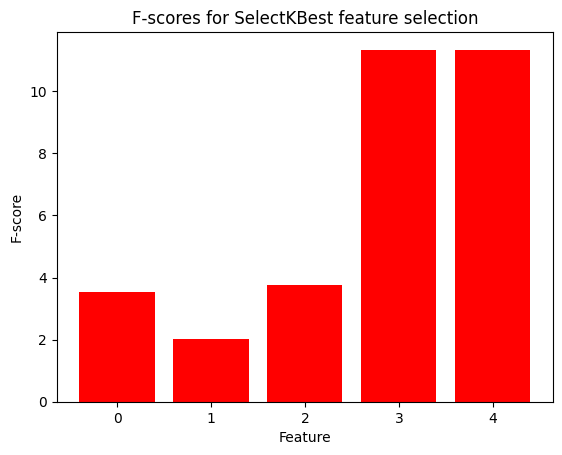

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# drop rows with missing values
d1.dropna(inplace=True)

# split the data into features and target variable
X = d1.drop(['SORANAME', 'Lemmes'], axis=1)
y = d1['Lemmes']

# encode the categorical variables using one-hot encoding
enc = OneHotEncoder(sparse=False)
X_enc = pd.DataFrame(enc.fit_transform(X[['SORATYPE']]))
cat_cols = enc.categories_[0]
X_enc.columns = [f"{cat_cols[i]}_{j}" for i in range(len(cat_cols)) for j in range(X_enc.shape[1]//len(cat_cols))]
X.drop(['SORATYPE'], axis=1, inplace=True)
X_enc.index = X.index
X = pd.concat([X, X_enc], axis=1)

# perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# get the names of the selected features
selected_features = X.columns[selector.get_support()]

# print the names of the selected features
print(selected_features)
print(X_new)


# plot the F-scores for each feature
scores = selector.scores_
plt.bar(range(len(scores)), scores)

# highlight the selected features
selected_indices = selector.get_support(indices=True)
for i in selected_indices:
    plt.bar(i, scores[i], color='r')

# add axis labels and title
plt.xlabel('Feature')
plt.ylabel('F-score')
plt.title('F-scores for SelectKBest feature selection')

# show the plot
plt.show()

Analyse des données
# ***Analyse des données***

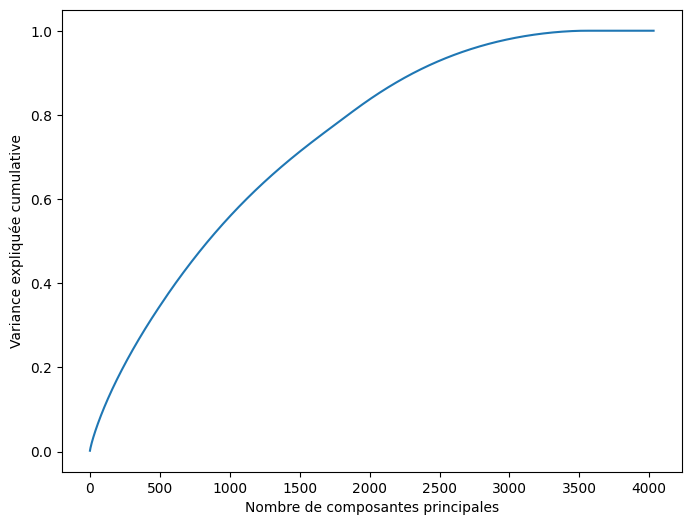

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = d.iloc[:, :-1].values
Y = d.iloc[:, -1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.show()


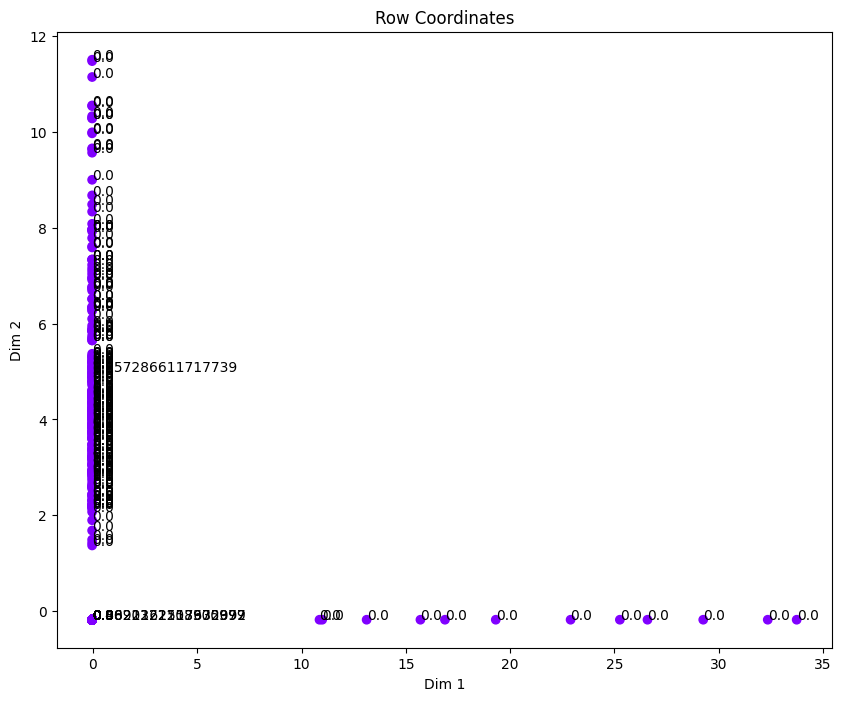

Nombre d'axes retenus :  37


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince

# Charger les données


# Séparer les variables explicatives de la variable cible
X = d.iloc[:, :-1].values
y = d.iloc[:, -1].values

# Standardisation des variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Réduction de dimension avec PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Appliquer l'AFC
n_components = 10
ca = prince.CA(n_components=2, engine='sklearn')
ca.fit(np.abs(X_pca))

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
for i, label in enumerate(y):
    ax.annotate(label, (X[i, 0], X[i, 1]))
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Row Coordinates")
plt.show()

# Obtenir le nombre d'axes retenus
explained_variance = pca.explained_variance_ratio_
n_axes = len([i for i in explained_variance if i > 0.001])
print("Nombre d'axes retenus : ", n_axes)

# **ACP**

[0.01123892 0.00896313]


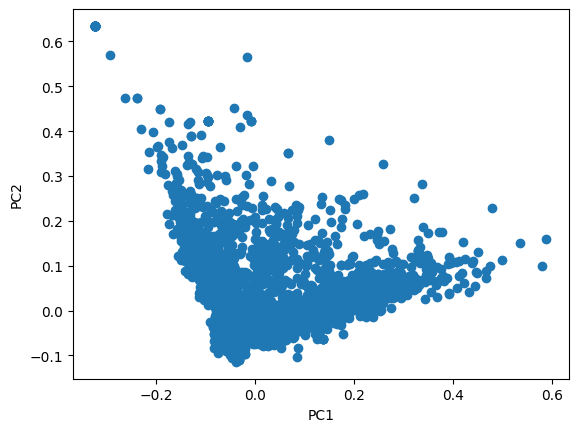

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


# Extract features (i.e., words) from d
features = d.columns[1:]

# Extract d values
X = d.values[:, 1:]

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print variance explained by each principal component
print(pca.explained_variance_ratio_)

# Plot d in PCA space
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# **SELECTED FEAUTRES**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Extract features (i.e., words) from data
features = d.columns[1:]

# Extract d values
X = d.values[:, 1:]
y = d.values[:, 0] 

# Perform feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)

# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = [features[i] for i in selected_indices]

# Print selected features
print(selected_features)

['آخر', 'آية', 'ألو', 'الله', 'رافع', 'رب', 'عالم', 'علم', 'كذب', 'مؤمن']


<ipython-input-23-36239ad84113>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d3.corr()


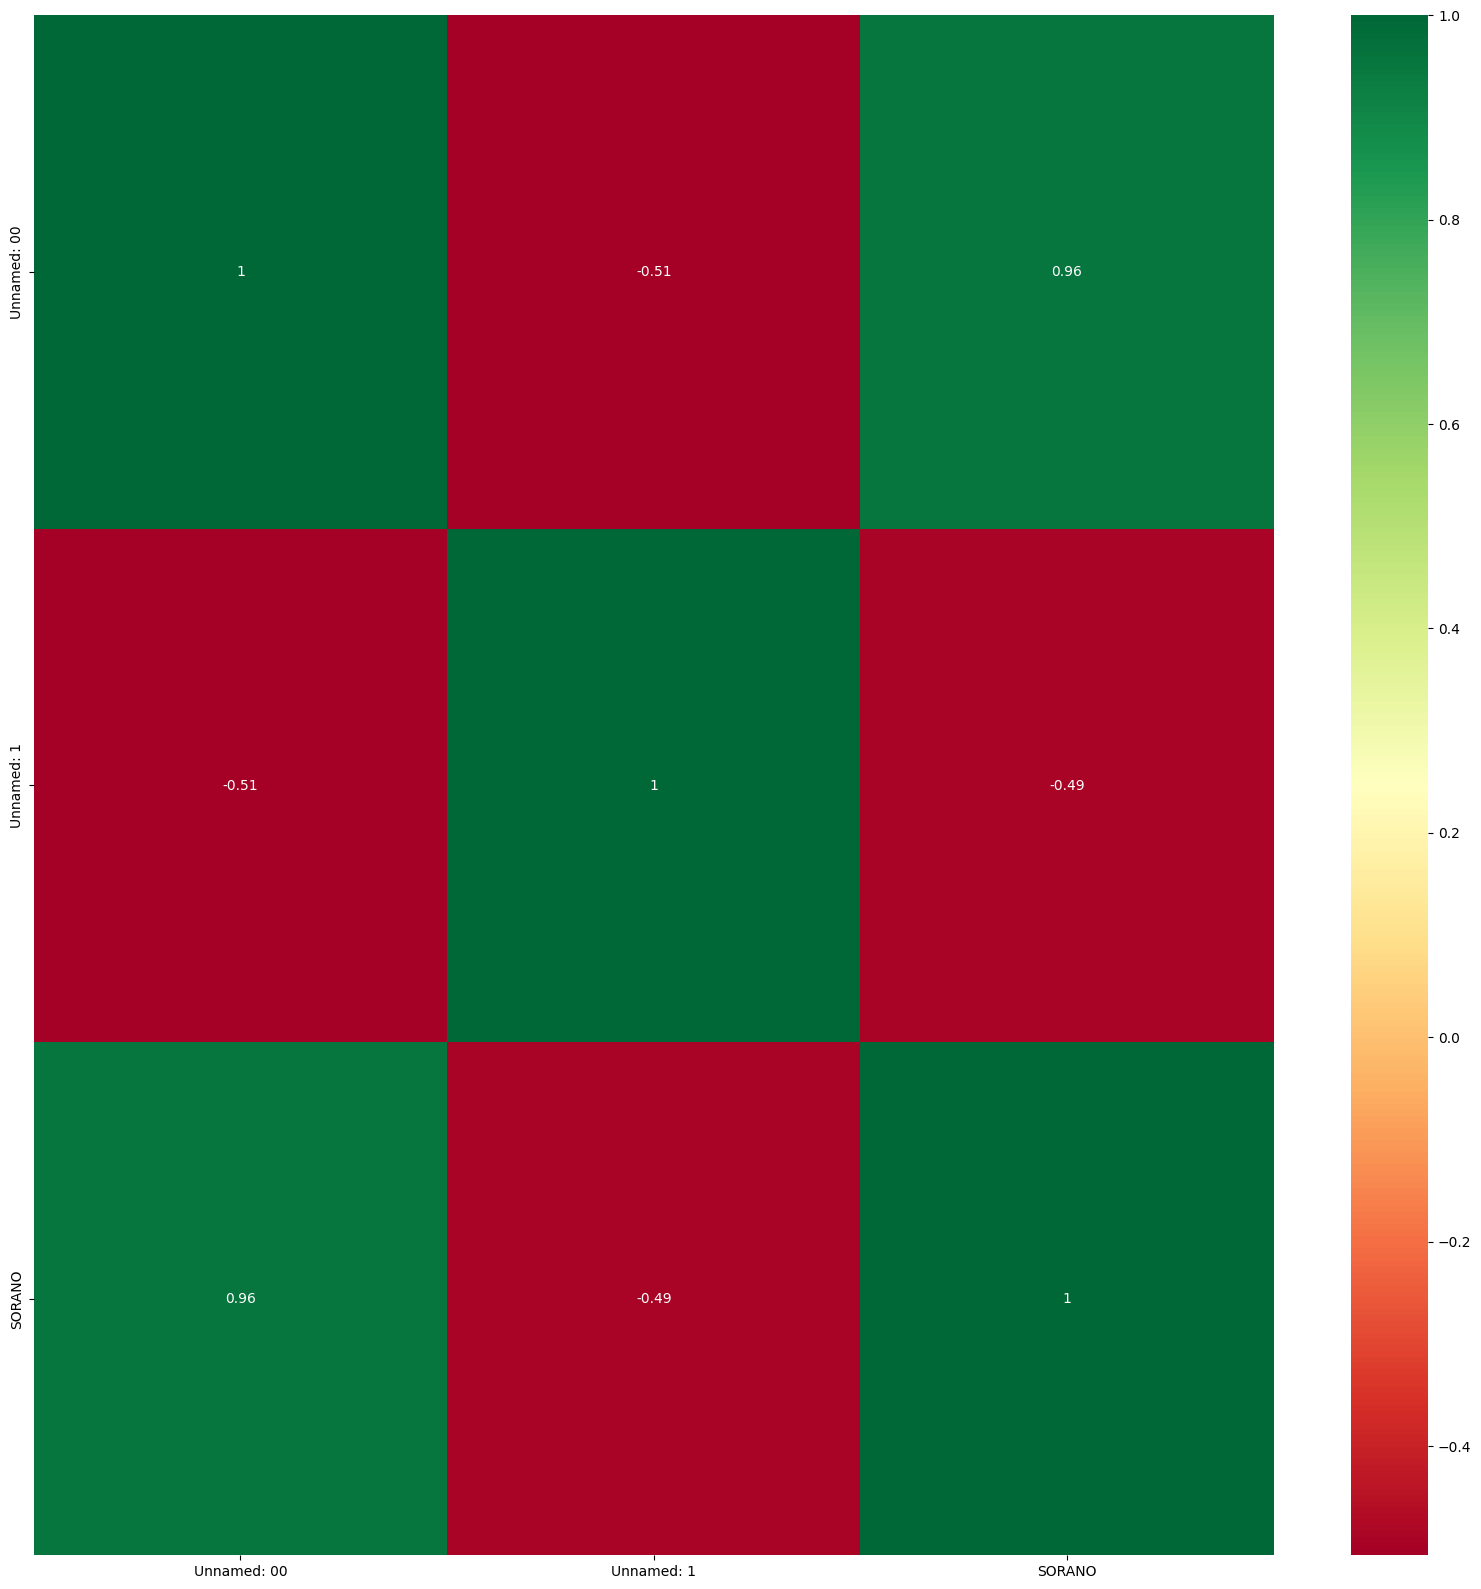

In [ ]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = d.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(d3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

            آت       آتى   آتية       آثر       آثم       آخذ       آخر  \
0    -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
1    -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
2    -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
3    -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
4    -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
...        ...       ...    ...       ...       ...       ...       ...   
6231 -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
6232 -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
6233 -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
6234 -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   
6235 -0.041281 -0.176224 -0.025 -0.026969 -0.020368 -0.037538 -0.101523   

          آخرة       آدم        آذ  ...      يم      يمنى      يمين     ينبوع  \
0    -0.127998 -0.

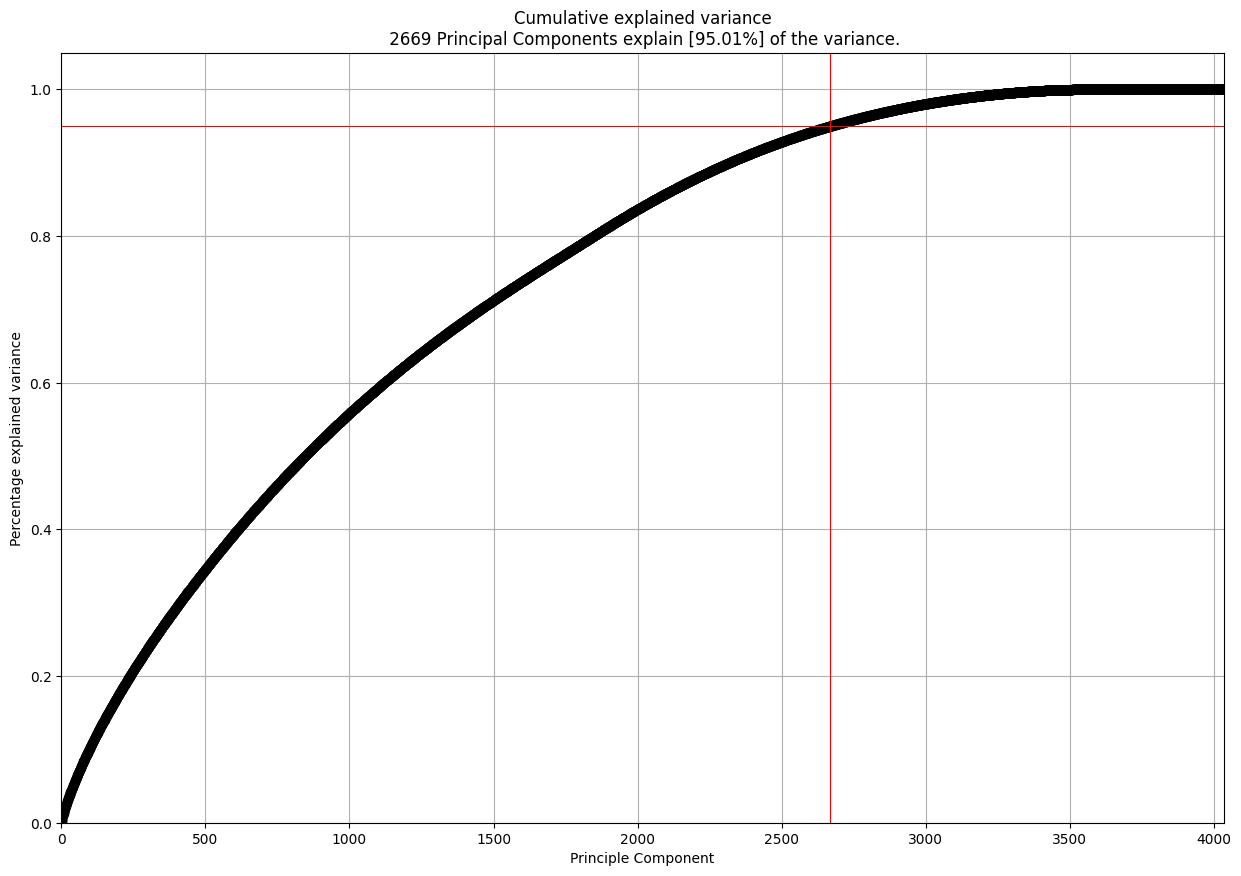

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 2669 Principal Components explain [95.01%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
dd=d
dd=dd.dropna()
dd=dd.select_dtypes([np.number])
df_normalized=(dd - dd.mean()) / dd.std()
df_normalized=df_normalized.select_dtypes([np.number])
print(df_normalized)
scaler = StandardScaler()
scaler.fit(dd)
X=scaler.transform(dd)    

pca = pca()
x_new = pca.fit_transform(X)


print(x_new['topfeat'])
pca.plot()

<ipython-input-35-4ff79c1552c2>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c', len(markers))


[pca] >Plot PC1 vs PC2 with loadings.


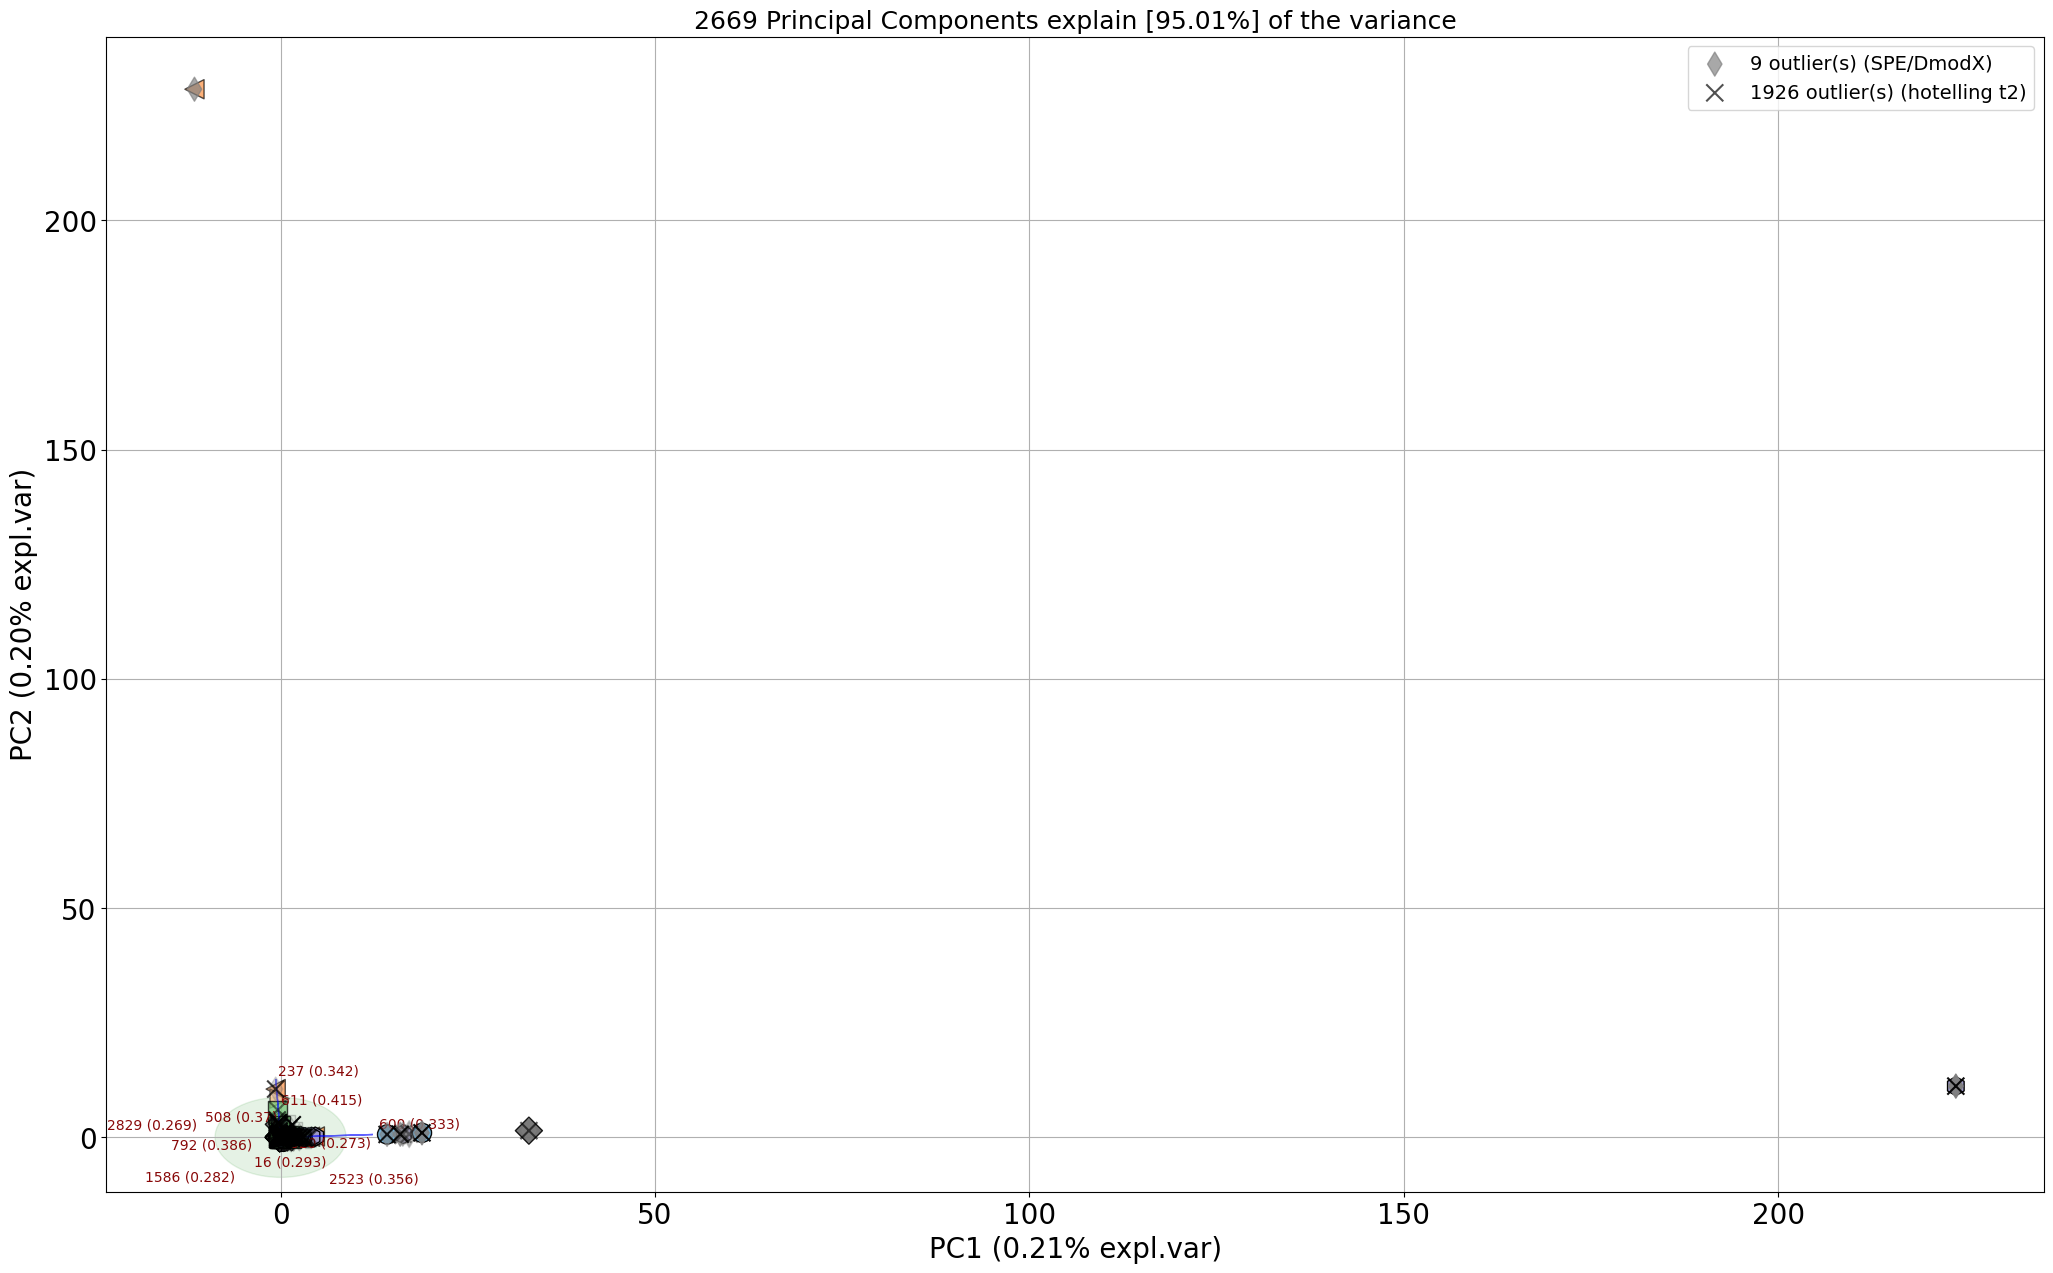

In [ ]:
import matplotlib.colors as mcolors
# All available markers
markers = np.array(['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])
# Create colors
cmap = plt.cm.get_cmap('tab20c', len(markers))
# Generate random integers
random_integers = np.random.randint(0, len(markers), size=X.shape[0])
color = cmap.colors[random_integers, 0:3]
size = np.random.randint(1,10, size=X.shape[0])
marker = markers[random_integers]
# Set alpha
alpha = np.random.rand(1, X.shape[0])[0][random_integers]


ax = pca.biplot(c=color,
                        s=190,
                        marker=marker,
                        alpha=alpha,
                         arrowdict={'fontsize':10, 'weight':'normal'},
                color_arrow='blue', title=None,SPE=True, HT2=True,
                 n_feat=10, visible=True)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


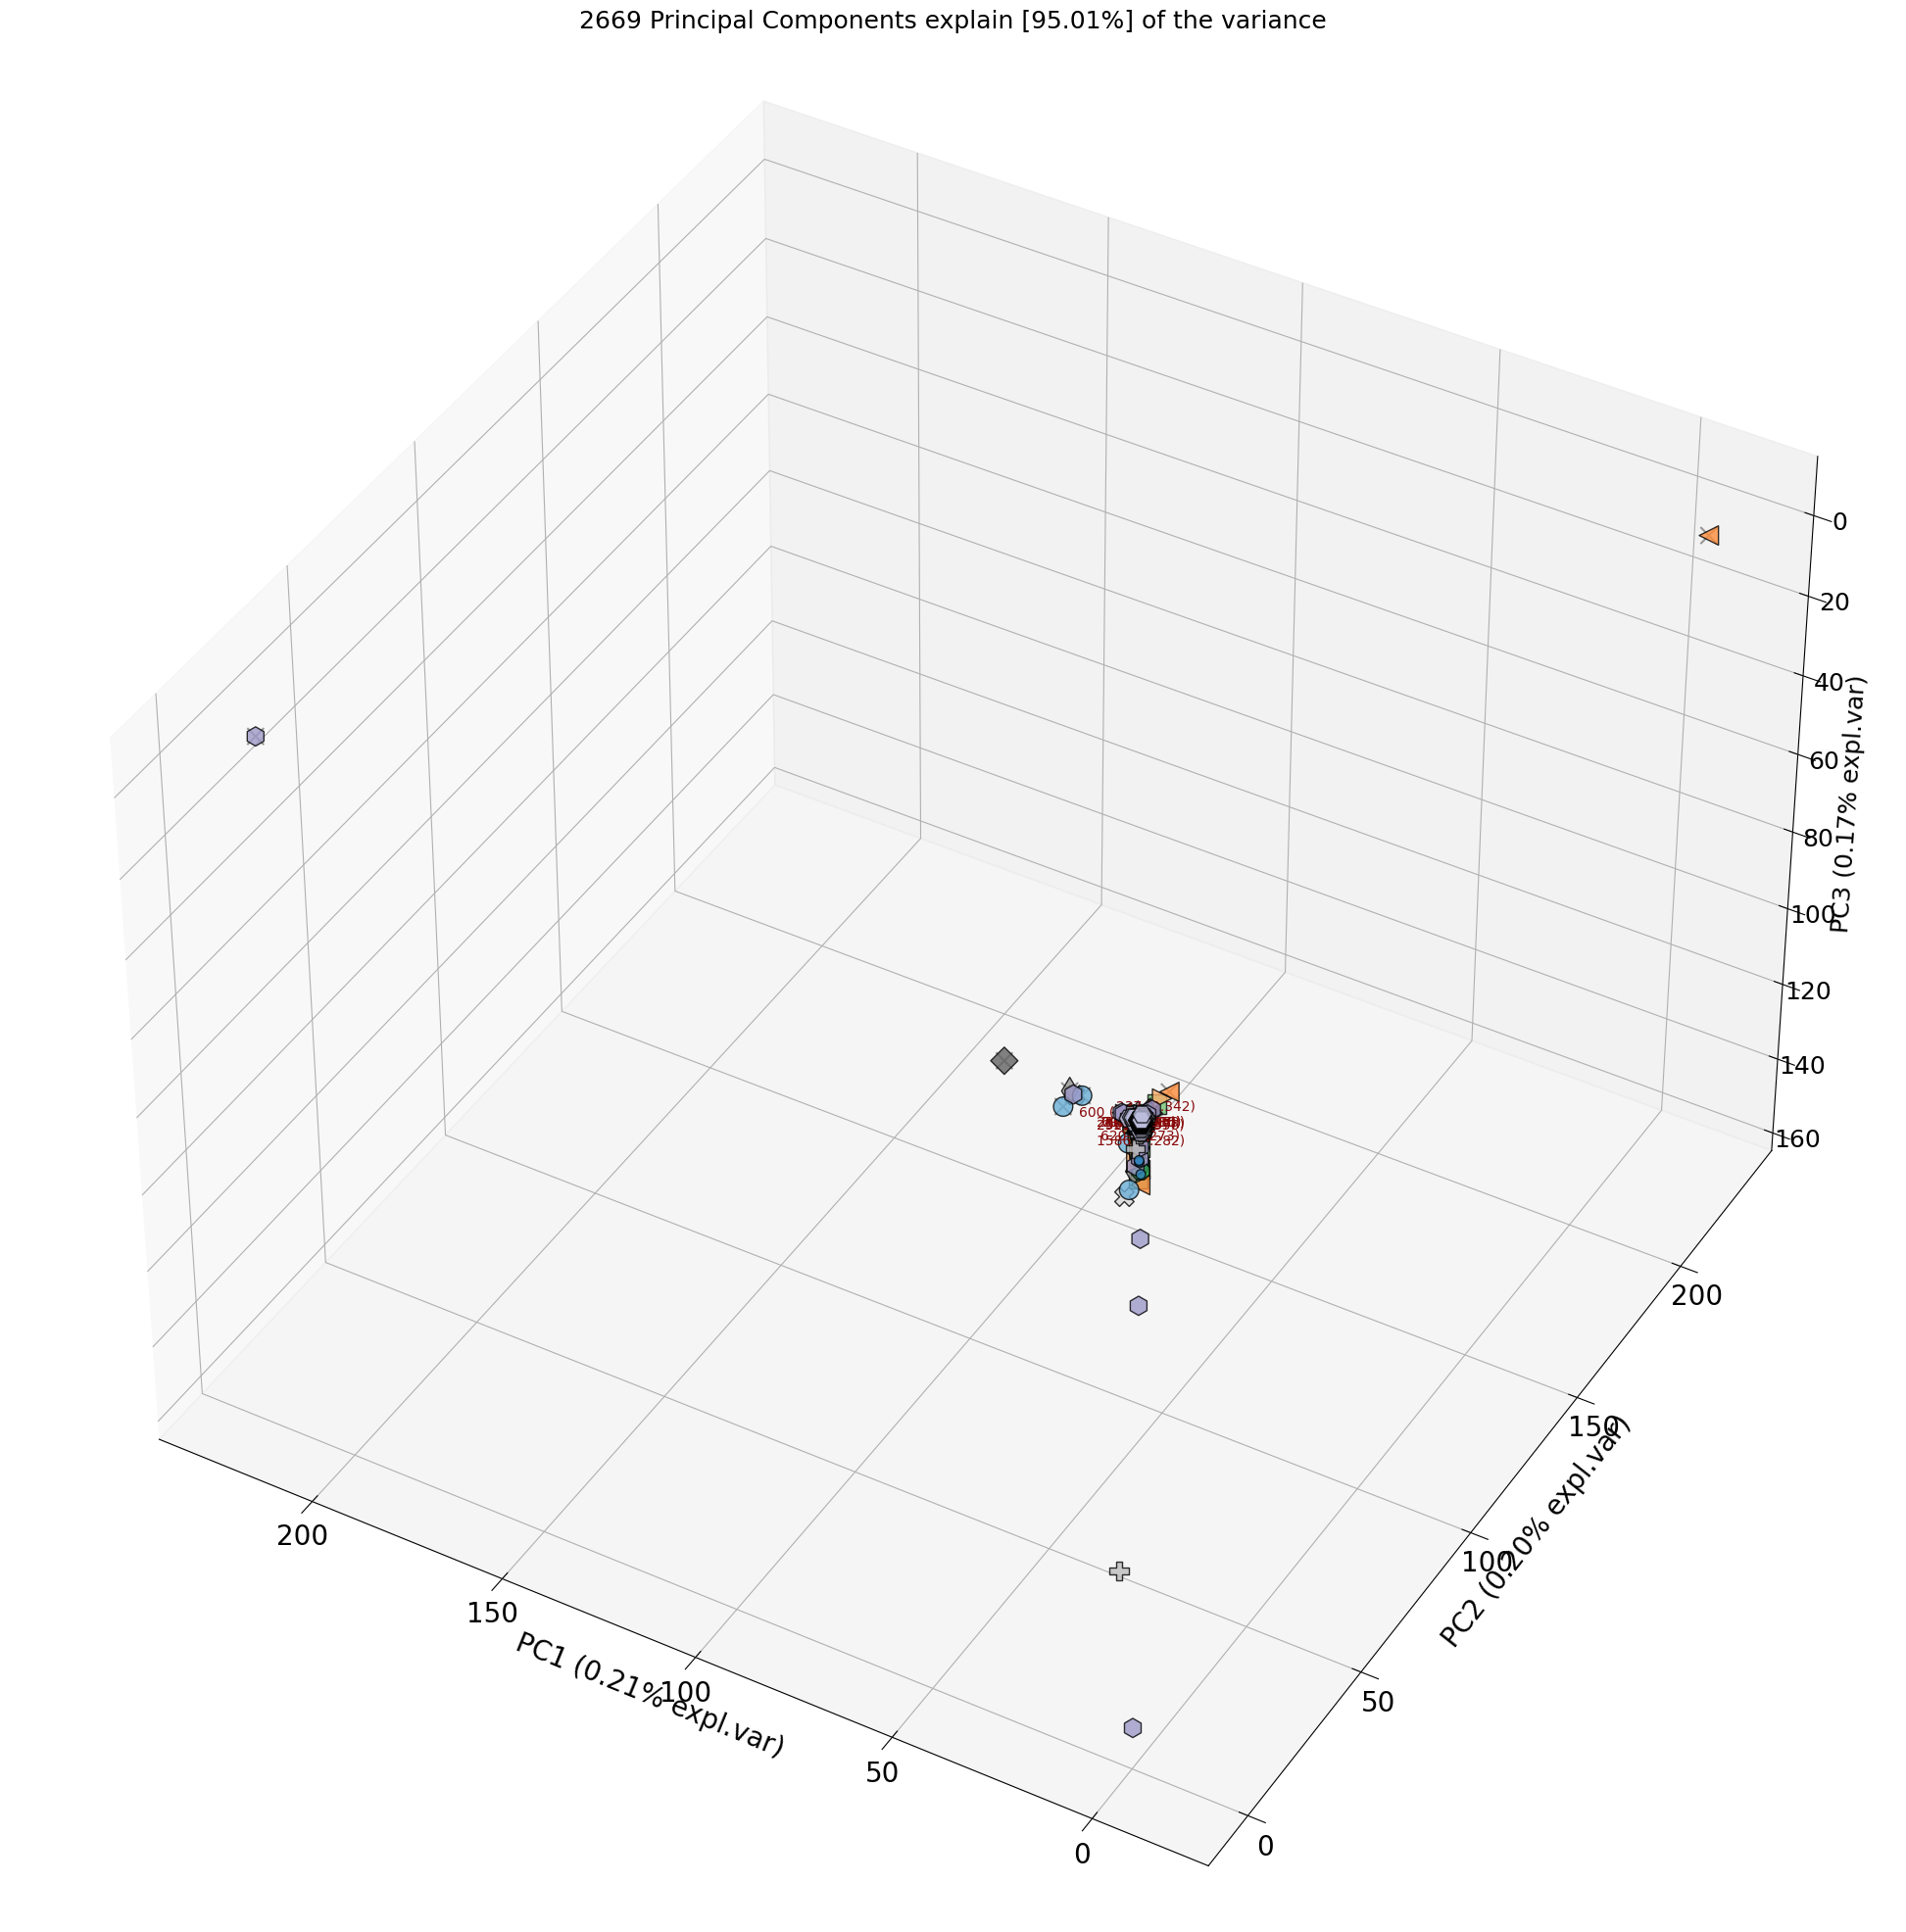

In [ ]:
ax = pca.biplot3d(n_feat=10,c=color,
                        s=200,
                        marker=marker,
                        alpha=alpha,
                         arrowdict={'fontsize':10, 'weight':'normal'},
                color_arrow='blue',SPE=True, legend=False)

Unnamed: 0    0
آت            0
آتى           0
آتية          0
آثر           0
             ..
Unnamed: 1    0
SORANO        0
SORATYPE      0
SORANAME      0
Lemmes        7
Length: 4040, dtype: int64
آت       0
آتى      0
آتية     0
آثر      0
آثم      0
        ..
يهود     0
يهودي    0
يوسف     0
يوم      0
يونس     0
Length: 4033, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

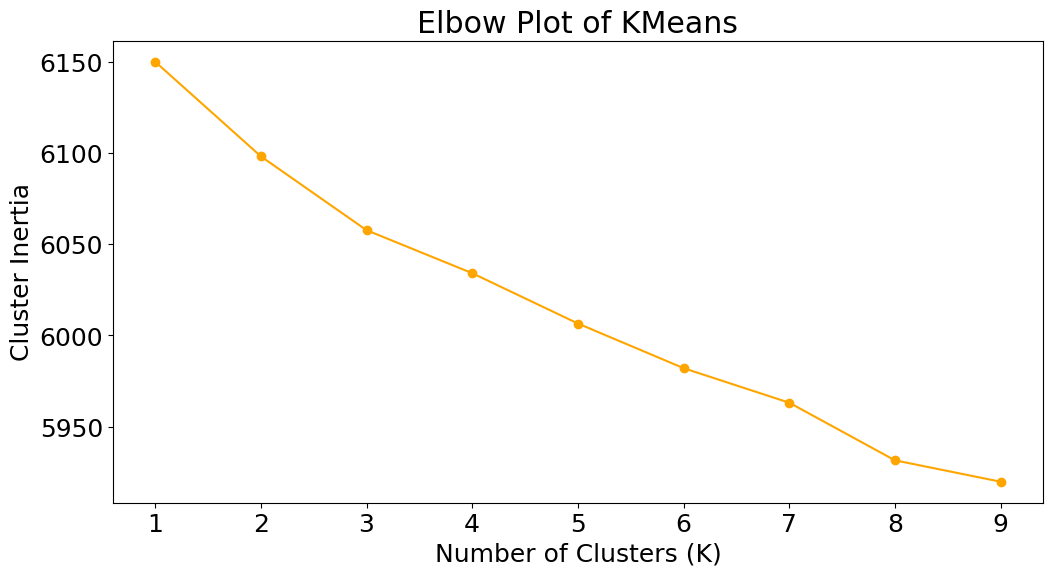

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print(d2.isnull().sum())
d3=d.copy()
del d3['Unnamed: 0']
print(d3.isnull().sum())
#scaler = StandardScaler()
#scaled_data=scaler.fit_transform(d3)

def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k,max_iter= 300)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()
clusters_centers, k_values = find_best_clusters(d3, 10)

generate_elbow_plot(clusters_centers, k_values)


In [ ]:
kmeans_model = KMeans(n_clusters = 7)

kmeans_model.fit_predict(d3)
d3.insert(0, "Cluster", kmeans_model.labels_, True)
d3



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,آت,آتى,آتية,آثر,آثم,آخذ,آخر,آخرة,آدم,...,يم,يمنى,يمين,ينبوع,ينع,يهود,يهودي,يوسف,يوم,يونس
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365197,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6233,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6234,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
d6=d2.copy()
d6.insert(0, "Cluster", kmeans_model.labels_, True)

d7=d6.groupby('Cluster')['Unnamed: 0'].apply(list)
for k in list(d7.keys()):
  print(k," ",d7[k])

0   [' إنسان عبد رب خلق  اتقى', ' خلق أرض جميع استوى سماء سوى سبع سماء عليم', ' خلق سماء أرض اختلاف ليل نهار فلك تجر بحر نفع إنسان أنزل الله سماء ماء أحيا أرض موت بث دابة تصريف ريح سحاب مسخر سماء أرض آية قوم ع', '  رب  ولد مس شر  الله خلق شاء قضى أمر   ', ' عيسى الله آدم خلق تراب   ', ' خلق سماء أرض اختلاف ليل نهار آية أولي لب', ' ذكر الله قيام قعود جنب تفكر خلق سماء أرض رب خلق باطل وقى عذاب نار', ' إنسان اتقى رب خلق واحدة خلق زوج بث رجل كثير نساء اتقى الله تساءل رحم الله رقيب', ' أراد الله خفف خلق إنسان ضعيف', ' حمد الله خلق سماء أرض ظلمة نور كفر رب عدل', ' خلق طين قضى أجل أجل مسمى امترى', ' خلق سماء أرض حق يوم     حق ملك يوم نفخ صور عالم غيب شهادة حكيم خبير', ' جعل الله شريك جن خلق خرق ابن بنت علم تعالى وصف', ' بديع سماء أرض  ولد أكن صاحبة خلق عليم', ' خلق صور  ملك سجد آدم سجد إبليس  ساجد', '  منع سجد أمر  خير خلق نار خلق طين', ' رب الله خلق سماء أرض يوم استوى عرش أغشى ليل نهار طلب حثيث شمس قمر نجم مسخرة أمر خلق أمر تبارك الله رب عالم', ' خلق أمة هدى حق عدل', ' نظر ملكوت سماء أرض خلق

0   ['البقرة', 'البقرة', 'البقرة', 'آل عمران', 'آل عمران', 'آل عمران', 'آل عمران', 'النساء', 'النساء', 'الأنعام', 'الأنعام', 'الأنعام', 'الأنعام', 'الأنعام', 'الأعراف', 'الأعراف', 'الأعراف', 'الأعراف', 'الأعراف', 'الأعراف', 'يونس', 'يونس', 'هود', 'الرعد', 'إبراهيم', 'إبراهيم', 'الحجر', 'الحجر', 'الحجر', 'الحجر', 'النحل', 'النحل', 'النحل', 'النحل', 'النحل', 'النحل', 'الإسراء', 'الإسراء', 'الإسراء', 'الإسراء', 'الكهف', 'الكهف', 'الكهف', 'مريم', 'مريم', 'طه', 'طه', 'طه', 'الأنبياء', 'الأنبياء', 'الأنبياء', 'الأنبياء', 'المؤمنون', 'المؤمنون', 'المؤمنون', 'المؤمنون', 'النور', 'الفرقان', 'الفرقان', 'الفرقان', 'الفرقان', 'الفرقان', 'الشعراء', 'الشعراء', 'الشعراء', 'الشعراء', 'النمل', 'النمل', 'القصص', 'العنكبوت', 'العنكبوت', 'العنكبوت', 'العنكبوت', 'الروم', 'الروم', 'الروم', 'الروم', 'الروم', 'الروم', 'لقمان', 'لقمان', 'لقمان', 'لقمان', 'السجدة', 'السجدة', 'السجدة', 'سبأ', 'فاطر', 'فاطر', 'يس', 'يس', 'يس', 'يس', 'يس', 'يس', 'يس', 'يس', 'الصافات', 'الصافات', 'الصافات', 'ص', 'ص', 'ص', 'الزمر', 

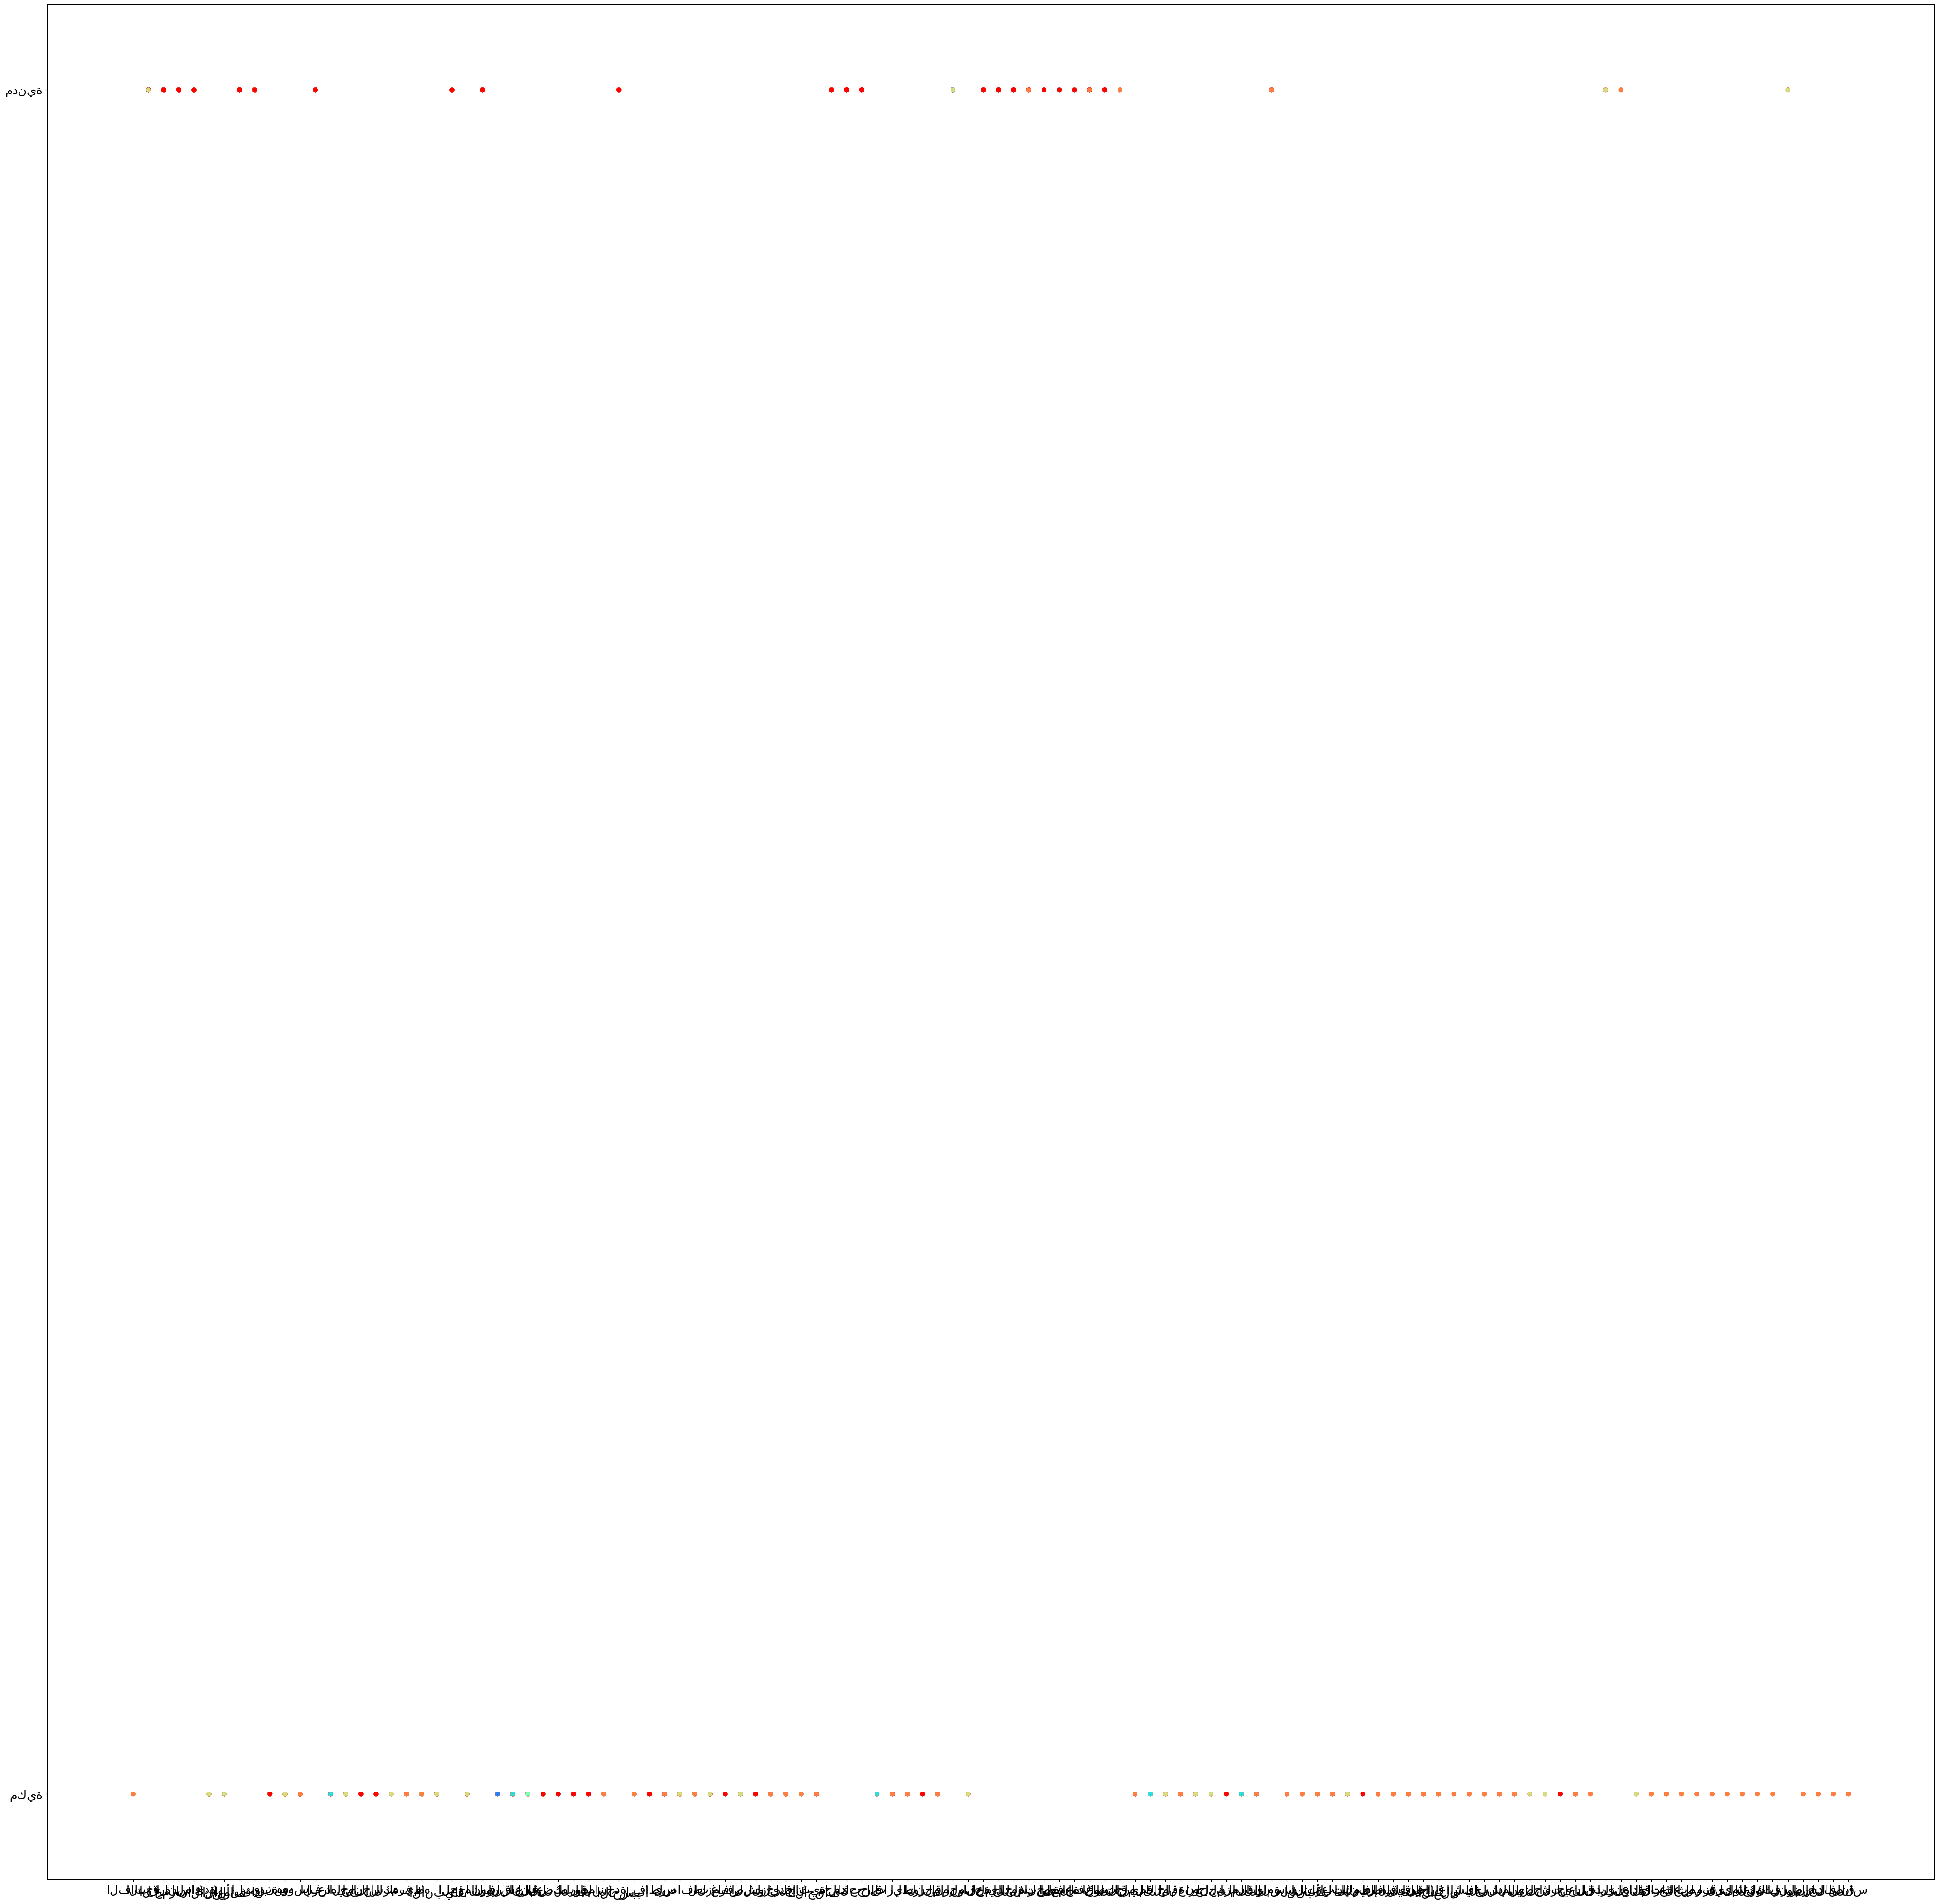

In [ ]:
d4=d6.groupby('Cluster')[ 'SORANAME'].apply(list)
for k in list(d4.keys()):
  print(k," ",d4[k])
fig, ax = plt.subplots(figsize=(50,50))
plt.scatter(d6["SORANAME"],d6["SORATYPE"],c=d6['Cluster'],cmap='rainbow')
fig.show()